## Machine Learning Modeling: Predicting Car Pricess with KNN Regression.
*Author: David Rodrigues. davidrodriguessp@hotmail.com. Aug 11, 2021.*

The objective of this project is to build a model to predict car prices based on their features. We used  the *Automobile Dataset* available at the the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/automobile). 

This dataset includes a list of cars and features as engine size, hoursepower and width. You can directly download the data clicking on this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

To build the model we used KNN Regression, the numeric columns of the dataset as features and the price as the target variable. The final model included four features: `horsepower`, `engine_size`, `curb_weight`, `width`and a k value of 2. The model reached a RMSE value of 2,170 and a R2 score of 90%.

Let's start reading the file into Pandas.

## Reading and Cleaning the Dataset

In [1]:
# Read the datafile into Pandas
import pandas as pd
cols=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels',
     'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cilinders',
     'engine_size', 'fuel_system', 'bore', 'stroke', 'compresion_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
     'highway_mpg', 'price']
cars = pd.read_csv(r'imports-85.data', header=None, names=cols)

In [2]:
# Display first rows
cars.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compresion_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


The KNN Regression can only take numeric columns. Let's drop all variables that are not numeric.

In [3]:
# Remove non-numeric features
cars = cars.drop(columns=['drive_wheels', 'engine_type', 'num_cilinders', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'engine_location',
    'fuel_system'])

Below we see that missing values are represented by `?`. Let's replace them with NaNs.

In [4]:
# Display the first rows
cars.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compresion_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500


In [5]:
# replace ? with NaN
import numpy as np
cars = cars.replace('?', np.nan)

## Dealing with Missing Values

We see that there are missing values in the dataset. We need to find a way to deal with them, since the model cannot handle missing values.

In [6]:
# Verify how many values are missing in each column
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compresion_ratio     205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(5), object(6)
memory usage: 25.7+ KB


The `normalized_losses` column has roughly 20% of missing values. Let's drop this column altogether from the dataset.

In [7]:
# Drop the column `normalized_losses`
cars = cars.drop(columns=['normalized_losses'])

Now, we transform the data into numeric, since KNN Regression only can take numeric variables.

In [8]:
# Transforming data types into numeric
cars['symboling']=cars['symboling'].astype('int')
cars.iloc[:,1:]=cars.iloc[:,1:].astype('float')

In [9]:
# Check again for missing values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling           205 non-null int64
wheel_base          205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curb_weight         205 non-null float64
engine_size         205 non-null float64
bore                201 non-null float64
stroke              201 non-null float64
compresion_ratio    205 non-null float64
horsepower          203 non-null float64
peak_rpm            203 non-null float64
city_mpg            205 non-null float64
highway_mpg         205 non-null float64
price               201 non-null float64
dtypes: float64(14), int64(1)
memory usage: 24.1 KB


We see that the target column `price` also has missing values. Let's drop all rows with the `price` missing.

In [10]:
# Drop rows in which price is missing
cars = cars.dropna(subset=['price'])

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
symboling           201 non-null int64
wheel_base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb_weight         201 non-null float64
engine_size         201 non-null float64
bore                197 non-null float64
stroke              197 non-null float64
compresion_ratio    201 non-null float64
horsepower          199 non-null float64
peak_rpm            199 non-null float64
city_mpg            201 non-null float64
highway_mpg         201 non-null float64
price               201 non-null float64
dtypes: float64(14), int64(1)
memory usage: 25.1 KB


Then, as we can see above, there are still some missing values in the other columns. As they are not that many - maximum of 4 - let's fill these missing values with the mean of each column.

In [12]:
# Fill missing values with the mean of each column
cars.iloc[:,:-1] = cars.iloc[:,:-1].fillna(cars.iloc[:,:-1].mean())

Below we see that now there are no more missing values in the dataset anymore.

In [13]:
# Display how many non-null values there are per column
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
symboling           201 non-null int64
wheel_base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb_weight         201 non-null float64
engine_size         201 non-null float64
bore                201 non-null float64
stroke              201 non-null float64
compresion_ratio    201 non-null float64
horsepower          201 non-null float64
peak_rpm            201 non-null float64
city_mpg            201 non-null float64
highway_mpg         201 non-null float64
price               201 non-null float64
dtypes: float64(14), int64(1)
memory usage: 25.1 KB


## Normalizing the Data

Each of the columns has a different scale. This can distort our model. We will normalize the data, making all columns range from 0 to 1.

In [14]:
# Create a list of features
feature_cols = cars.columns.tolist()
feature_cols.remove('price')

In [15]:
# Normalize the columns 
cars_normalized = (cars - cars.min()) / (cars.max() - cars.min())

As `price` is our target column, we want to have it in its original format (nor normalized). Let's add the original `price` values back to our dataframe.

In [16]:
# Adding back the original price column
cars_normalized['price'] = cars['price']

## Testing Different Models and Comparing RMSE

Now, we will create different models and compare their accuracy. The objective is to identify the model with the lowest error. We wil use the Root Mean Square Error, or RMSE, as our error metric to compare the results.

We start by creating a function that we will use to:
- Split the dataset in train and test sets
- Create an instance of KNN Neighbors Regressor
- Fit the model to the train set
- Use the model to make predictions in the test set
- Calculate the RMSE

We will apply this function to create univariate models and compare their results.

### Creating Univariate KNN Regression Models

In [17]:
'''Create a function that takes a dataframe, feature col and  target col
split the data in train/test, instantiate a KNN regression model, fit the model,
make predictions and return the RMSE of the model
'''
def knn_train_test(feature, target, dataframe):
    import numpy as np
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(dataframe[[feature]], 
                                       dataframe[target], test_size=0.3, random_state=1)
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, predictions) ** (1/2)
    return RMSE

Next, let's use the function to create one univariate model for each feature of the dataframe and calculate RMSE.

In [18]:
# using the function calculate RMSE to each feature
rmses = {}
for i in feature_cols:
    rmse = knn_train_test(i, 'price', cars_normalized)
    rmses[i]=rmse
import pandas as pd
print(rmses)

{'symboling': 6769.058702365165, 'wheel_base': 4793.390985342282, 'length': 3946.45223302411, 'width': 3752.3820736813627, 'height': 6845.449557283398, 'curb_weight': 3622.017715194161, 'engine_size': 3301.46689722048, 'bore': 5455.307928259518, 'stroke': 6260.138201899798, 'compresion_ratio': 6535.917603268979, 'horsepower': 3316.586001929804, 'peak_rpm': 7127.422704861168, 'city_mpg': 3856.9397378801946, 'highway_mpg': 4080.557635630811}


Then, we convert the results into a series to make data manipulation easier.

In [19]:
# Transform dict into a Series and sort the values in ascending order
rmses_series = pd.Series(rmses).sort_values()
print(rmses_series)

engine_size         3301.466897
horsepower          3316.586002
curb_weight         3622.017715
width               3752.382074
city_mpg            3856.939738
length              3946.452233
highway_mpg         4080.557636
wheel_base          4793.390985
bore                5455.307928
stroke              6260.138202
compresion_ratio    6535.917603
symboling           6769.058702
height              6845.449557
peak_rpm            7127.422705
dtype: float64


As we can see above, `engine_dize` is the feature that generates the lowest RMSE, that is, the most accurate model. The other features that bring the most accurate univariate models are: `horsepower`, `curb_weight`, `width` and `city_mpg`. Below we display the feature with the lowest RMSE.

In [20]:
# Extract the minimum value in the dictionary
feature_lower_rmse = min(rmses, key=rmses.get)
print('The feature with the minimum RMSE is: ', feature_lower_rmse)

The feature with the minimum RMSE is:  engine_size


### Choosing the Right Features

Next, we will test the features with different `k values`. This will help us define the best features. We start by modifying our initial function to accept different `k values`.

In [21]:
'''Modify the function to include the parameter for k'''
def knn_train_test_with_k (feature, target, dataframe, k):
    import numpy as np
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(dataframe[[feature]], 
                                       dataframe[target], test_size=0.3, random_state=1)
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, predictions) ** (1/2)
    return RMSE

In [22]:
# Create a list of k values we will use to train different models
ks = [1,3,5,7,9]

Then, let's use a for loop together with our function and train multiple models with each feature combined with different `k values`. Let's record all RMSEs in a new list called `rmse_list`.

In [23]:
# Create a list of lists with the RMSE of each model combining features and k values
rmse_list = []
for i in feature_cols:
    l = []
    for j in ks:
        r = knn_train_test_with_k(i, 'price', cars_normalized, j)
        l.append(r)
    rmse_list.append(l)

To make the data easier to analyse, let's transform the list of lists into a Data Frame.

In [24]:
# Create a dataframe based on the list of lists
rmse_df = pd.DataFrame(rmse_list, index=feature_cols, columns=ks)
# Round the values in the dataframe
rmse_df = rmse_df.round()

Below, we created a `heatmap` to visualize the RMSEs for each combination of `features` and `k values`. The darker the region of the graph, the lowest the RMSE, that is, the most accurate the model.

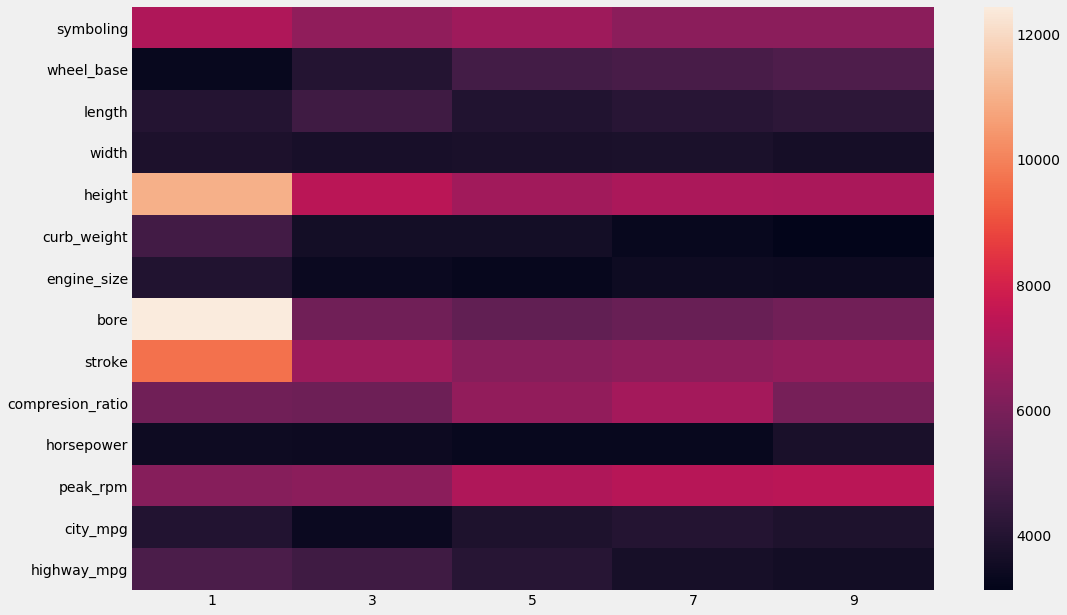

In [44]:
# Display the RMSE data in a heatmap
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(data=rmse_df)
plt.show()

We can see that the model that takes `wheel_base` with a `k value` of 1 seems to be an accurate. The same happens to `width` with `k value` of 9. Let's build a line plot to make the interpretation easier.

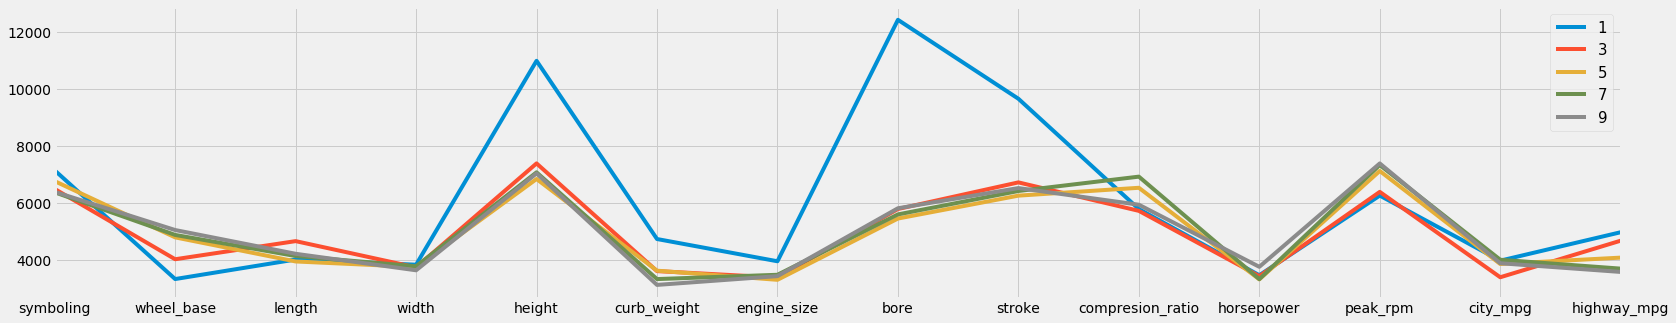

In [26]:
# plot the data into a lineplot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
rmse_df.plot(figsize=(25,5))
plt.xticks(ticks=range(0,14), labels=feature_cols, fontsize=14, rotation=0)
plt.legend(fontsize=15)
plt.show()

In the graph above, we see more clearly the low RMSE for the combination `wheel_base` and `k value` of 1, but it is still difficult to verify the lowest RMSE. The table below displays RMSE for all combinations of feature and k values.

In [27]:
rmse_df

,1,3,5,7,9
symboling,7148.0,6495.0,6769.0,6377.0,6393.0
wheel_base,3328.0,4024.0,4793.0,4879.0,5051.0
length,4015.0,4661.0,3946.0,4137.0,4216.0
width,3832.0,3738.0,3752.0,3778.0,3636.0
height,11000.0,7393.0,6845.0,7079.0,7042.0
curb_weight,4735.0,3607.0,3622.0,3327.0,3122.0
engine_size,3953.0,3381.0,3301.0,3478.0,3431.0
bore,12441.0,5790.0,5455.0,5600.0,5816.0
stroke,9666.0,6726.0,6260.0,6423.0,6526.0
compresion_ratio,5788.0,5725.0,6536.0,6928.0,5941.0


### Creating Multivariate KNN Regression Models

Let's now create models with multiple features. For this, we modified our function to accept a list of features instead of just one. 

In [28]:
# Lets modify the funciton to include multiple columns
'''Modify the function to accept multiple columns and the standard k'''
def knn_train_test_multiple_cols (feature_list, target, dataframe):
    import numpy as np
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(dataframe[feature_list], 
                                       dataframe[target], test_size=0.3, random_state=1)
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, predictions) ** (1/2)
    return RMSE

We then choose some feature combinations with the best ones identified in the univariate modeling we run previously. We chose four lists of features: best_two, with the potentially best two features, best_three, best_four and best_five. You can see the combinations below.

In [29]:
# Create lists with four different combinations of features 
best_two = ['horsepower', 'engine_size']
best_three = ['horsepower', 'engine_size', 'curb_weight']
best_four = ['horsepower', 'engine_size', 'curb_weight', 'width']
best_five = ['horsepower', 'engine_size', 'curb_weight', 'width', 'city_mpg']

multiple_feature_list = [best_two, best_three, best_four, best_five]

Next, we train different models with these feature combinations, using the default `k value` of 5.

In [30]:
# train one model for each of the 4 feature combinations above and display RMSE
multiple_feature_rmse = []
for feature in multiple_feature_list:
    r = knn_train_test_multiple_cols (feature, 'price', cars_normalized)
    multiple_feature_rmse.append(r)

print(' Best 2 features RMSE: ', multiple_feature_rmse[0], '\n',
      'Best 3 features RMSE: ', multiple_feature_rmse[1], '\n', 
      'Best 4 features RMSE: ', multiple_feature_rmse[2], '\n', 
      'Best 5 features RMSE: ', multiple_feature_rmse[3], '\n', 
     )

 Best 2 features RMSE:  3052.7282408997503 
 Best 3 features RMSE:  3221.4488752326497 
 Best 4 features RMSE:  2669.0053897457387 
 Best 5 features RMSE:  2541.3088930384015 



From this analysis, we see that the model with 5 and the one with 4 features brought the best results. Next, we will vary the `k value` to see how different model parameters can further improve results.

## Hyperparameter Tuning

Hyperparameters are parameters we choose for the model instantiation. They are part of the model definition and independent from the data we are using to train the model. In the case of the KNN Regression, the `k value` is the hyperparameter we want to tune, that is, to find the best value to produce a model with the lowest error scores.

Considering each of the three best feature combinations we identified before, we will vary `k values` from 1 to 25, and verify how model accuracy varies. For this, we will consider the Best 2, Best 4 and Best 5 feature combinations.

In [31]:
# Creating a list of feature combinations and a list of k values from 1 to 25
features_best3_models = [best_two, best_four, best_five]
k_options = [x for x in range(1,26)]

Let's then modify again our function to accept a feature list, the target column, the dataframe and k value we want to use to make predictions.

In [32]:
# Modify the function to include again the k value
'''Modify the function to accept multiple columns and multiple k values'''
def knn_train_test_multiple_cols_ks (feature_list, target, dataframe, k):
    import numpy as np
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(dataframe[feature_list], 
                                       dataframe[target], test_size=0.3, random_state=1)
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, predictions) ** (1/2)
    return RMSE

Next, we will build 25 different models, varying the `k value` for each of the 3 feature combinations. We will save RMSE results for each model in a list of lists called final_models_rmse.

In [33]:
# Calculate the RMSE for each of the 3 models, for 1-25 k values
final_models_rmse = []
for feature in features_best3_models:
    l = []
    for k in k_options:
        r = knn_train_test_multiple_cols_ks(feature, 'price', cars_normalized, k)
        l.append(r)
    final_models_rmse.append(l)

Then, we transform the results in a datafrae for making data manipulation easier.

In [34]:
# Transform the results into a dataframe
final_models_df = pd.DataFrame(final_models_rmse)

In [35]:
# Transpose the dataframe to make visualization easier
final_models_df = final_models_df.T

In [36]:
# Add column and index names to the dataframe
final_models_df.columns = ['best_two_features', 'best_four_features', 'best_five_features']
df_index = [x for x in range(1,26)]
final_models_df.index = df_index

## Visualizing the Data

Again, let's create a `heatmap` with all combinations of features and `k values`. The visualization will help us pin-point the models with highest accuracy, that is, lowest RSME.

Again, the darkest colors in the graph indicate the most accurate models, with the lowest RMSE.

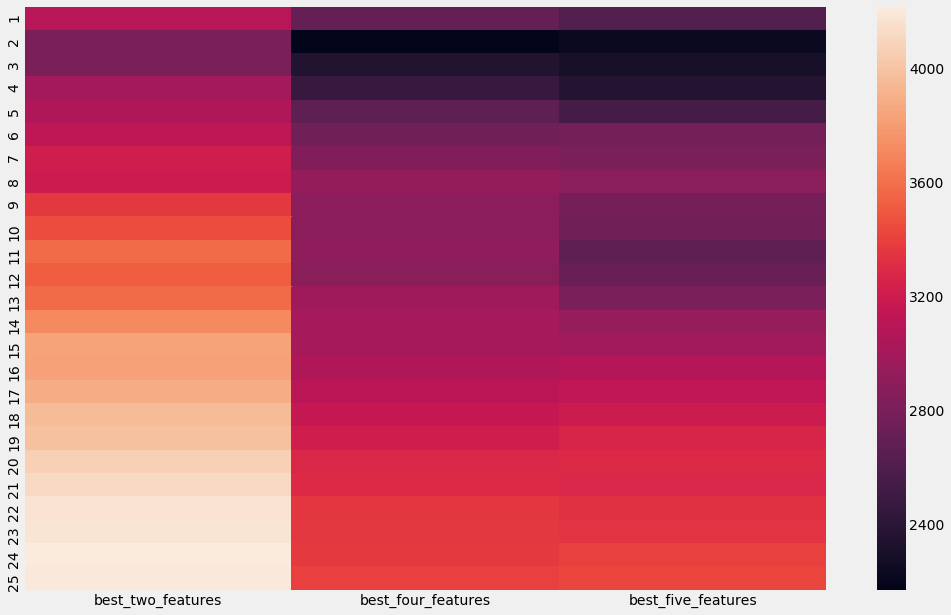

In [37]:
# create a heatmap
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(data=final_models_df)
plt.show()

We see that low k values, from 2 to 5, seem to generate the best models, especially coupled with four or five features. Models with the highest k values tend to be associated with higher RMSE values.

Let's now build a line plot to better visualize the RMSE for different models.

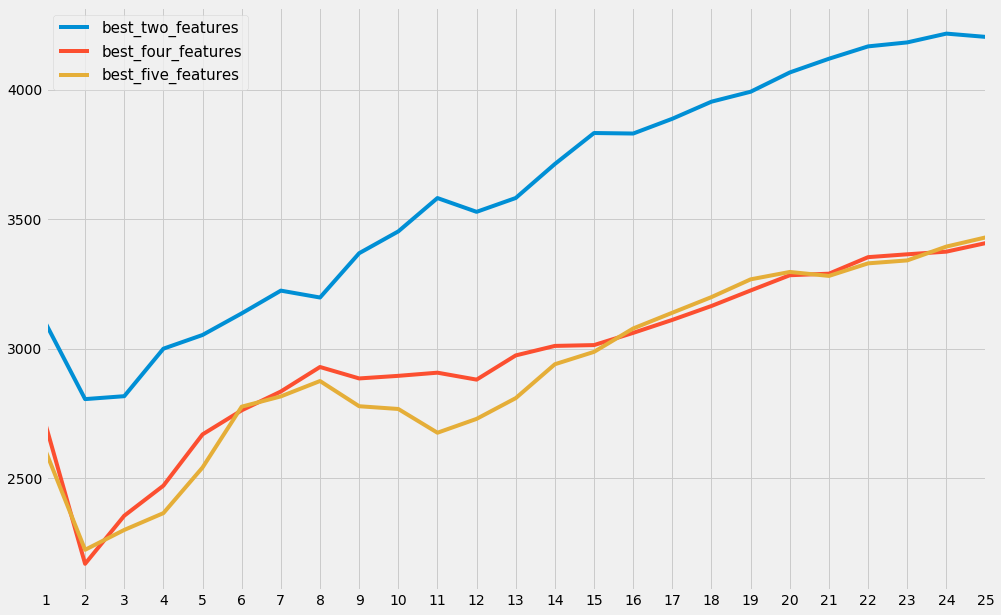

In [38]:
# now line plots
plt.style.use('fivethirtyeight')
final_models_df.plot(figsize=(15,10))
plt.xticks(ticks=range(1,26))
plt.legend(fontsize=15)
plt.show()

In the graph above, we see that a model with four features, that is, `horsepower`, `engine_size`, `curb_weight` and `width`, coupled with a `k value` of 2 is the one with the lowest RMSE, and consequently the highest accuracy. In the table below we can see the exact number of the RMSE for this model: 2,170.

In [39]:
final_models_df.round().head()

,best_two_features,best_four_features,best_five_features
1,3096.0,2702.0,2602.0
2,2805.0,2170.0,2224.0
3,2816.0,2355.0,2300.0
4,3000.0,2471.0,2365.0
5,3053.0,2669.0,2541.0


## Final Model

The model chosen includes four features - `horsepower`, `engine_size`, `curb_weight` and `width`- coupled with a `k value` of 2. Below, we recreate this model, saving it in the variable `final_model`. 

Then, we use the final model to make predictions and compare them with the actual price results.

In [40]:
# Recreating the final model and saving it as final_model
final_features = ['horsepower', 'engine_size', 'curb_weight', 'width']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars_normalized[final_features], 
                                       cars_normalized['price'], test_size=0.3, random_state=1)
from sklearn.neighbors import KNeighborsRegressor
final_model = KNeighborsRegressor(n_neighbors=2)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error
final_rmse = mean_squared_error(y_test, final_predictions) ** (1/2)
print(round(final_rmse))

2170.0


Below, we use the `final_model` to predict the price of the first row in the dataframe, then comparing it to the actual price.

In [41]:
# Predict the price for the first row of the dataframe
prediction_first_price = final_model.predict([cars_normalized[['horsepower'
                                                             , 'engine_size', 'curb_weight', 'width']].iloc[0]])
# Saving the actual price of the car in the first row in a new variable
actual_first_price = cars_normalized['price'][0]

Then, we compare the predicted and actual prices.

In [42]:
#  Compare with the actual price in the first row
print('Actual Price: ', str(actual_first_price), 'Prediction: ', 
      str(prediction_first_price), 'Difference: ', 
      str(abs(actual_first_price - prediction_first_price)),
         'Diff. / Actual Price: ', str((abs(actual_first_price - prediction_first_price)/actual_first_price)))

Actual Price:  13495.0 Prediction:  [14997.5] Difference:  [1502.5] Diff. / Actual Price:  [0.11133753]


We see that the price is not the same as predicted, but it is similar, with an error of roughly 11% the actual price. 

Finally, let's calculate the coeficient of determination, or R2, another accuracy metric.

In [43]:
# calculate R2 for the final_model
from sklearn.metrics import r2_score
r2_score(y_test, final_predictions)

0.905161909913873

Our model reached a R2 of 90%, what tend to be considered a decent value for this type of problem (predicting car prices). The interpretation of the R2 will depend on the context. For example, if the prediction is related to health-related problems that may put people at risk, 90% could be considered low.


# Conclusion

In this project, we used KNN Regression to predict car prices based on different vehicle characteristics. The final model included 4 features - `horsepower`, `engine_size`, `curb_weight` and `width` - and a k value of 2. The model reached an R2 of 90% and an RMSE of 2,170, lower than all other models tested.